<a target="_blank" href="https://colab.research.google.com/github/wbfrench1/stock/blob/main/src/get_stock_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [57]:
import pandas as pd
import numpy as np
import yfinance as yf
#from yahoofinance import HistoricalPrices
import json
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

# Plan

1. Graph Historical Performance
   1. Pull one stocks data
   1. Get stock data over a time period
   1. Graph stock price over time period
1. Get S&P500 company info
1. Get multiple ticker price data
1. Get recent adjusted closing price
1.

# 1. Graph Historical Performance

### 1. Pull one stocks data

In [58]:
meta = yf.Ticker("META")
str_period = '5y'
str_interval = '1mo'

### Get Data over a specified period of time and interval

In [59]:
meta.history(period=str_period,
             interval=str_interval).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-01 00:00:00-04:00,192.271106,203.188233,187.974031,201.034714,258303900,0.0,0.0
2019-12-01 00:00:00-05:00,201.523236,208.302811,192.590126,204.633865,276257100,0.0,0.0
2020-01-01 00:00:00-05:00,206.129361,223.526975,200.456440,201.303894,347314600,0.0,0.0
2020-02-01 00:00:00-05:00,202.829314,218.113298,181.274218,191.892242,317547300,0.0,0.0
2020-03-01 00:00:00-05:00,193.447558,196.647928,136.688458,166.299301,649467700,0.0,0.0


### Graph stock data over time period

<Axes: xlabel='Date', ylabel='Close'>

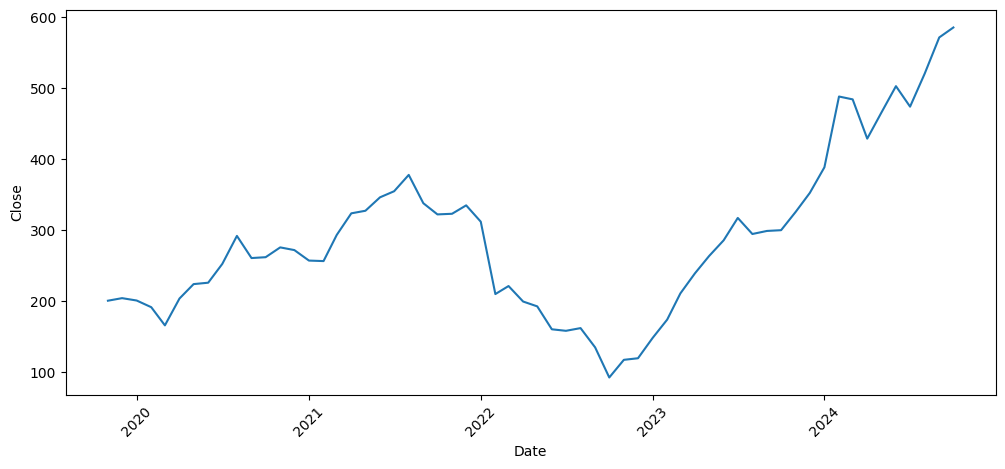

In [60]:
t_figsize = (12,5)
fig, ax = plt.subplots(figsize=t_figsize)
plt.xticks(rotation=45)
sns.lineplot(x= meta.history(period=str_period,
                             interval=str_interval).index,
             y= meta.history(period=str_period,
                             interval=str_interval)['Close'],
             ax= ax)

In [61]:
meta.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-04 00:00:00-04:00,505.587656,516.097649,503.589562,512.251282,8335200,0.0,0.0
2024-09-05 00:00:00-04:00,511.232285,521.132844,510.662821,516.367371,8640900,0.0,0.0
2024-09-06 00:00:00-04:00,521.382602,524.080041,497.775119,499.793182,14744500,0.0,0.0
2024-09-09 00:00:00-04:00,505.677588,510.842644,501.601460,504.308899,11047800,0.0,0.0
2024-09-10 00:00:00-04:00,507.675682,513.689934,499.553426,504.308899,9899000,0.0,0.0
2024-09-11 00:00:00-04:00,506.526780,512.630942,495.127651,511.342163,10782500,0.0,0.0
2024-09-12 00:00:00-04:00,516.557221,526.208049,514.728948,525.099060,11993300,0.0,0.0
2024-09-13 00:00:00-04:00,519.844106,527.077196,516.617143,524.119995,10321400,0.0,0.0
2024-09-16 00:00:00-04:00,524.539978,534.099976,517.400024,533.280029,9527600,0.5,0.0


# Get S&P 500 stock tickers

In [62]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_sp500_co_info = table[0]
df_sp500_co_info.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [63]:
df_sp500_co_info['Symbol']

,Symbol
0,MMM
1,AOS
2,ABT
3,ABBV
4,ACN
...,...
498,XYL
499,YUM
500,ZBRA
501,ZBH


https://www.marketdata.app/how-to-use-the-yahoo-finance-api/

# Get Multiple Ticker Price Data

## Put S&P 500 tickers into a string

In [64]:
# If the below download fails, then it might be because of the replacement of . with -
str_sp500_stk_tkrs= ' '.join(i if '.' not in i else i.replace('.','-') for i in df_sp500_co_info['Symbol'])
print('Number of tickers in sp500:', len(df_sp500_co_info['Symbol']), '\n')
str_sp500_stk_tkrs

Number of tickers in sp500: 503 



'MMM AOS ABT ABBV ACN ADBE AMD AES AFL A APD ABNB AKAM ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMTM AEE AEP AXP AIG AMT AWK AMP AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ADM ANET AJG AIZ T ATO ADSK ADP AZO AVB AVY AXON BKR BALL BAC BAX BDX BRK-B BBY TECH BIIB BLK BX BK BA BKNG BWA BSX BMY AVGO BR BRO BF-B BLDR BG BXP CHRW CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE COR CNC CNP CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH CL CMCSA CAG COP ED STZ CEG COO CPRT GLW CPAY CTVA CSGP COST CTRA CRWD CCI CSX CMI CVS DHR DRI DVA DAY DECK DE DELL DAL DVN DXCM FANG DLR DFS DG DLTR D DPZ DOV DOW DHI DTE DUK DD EMN ETN EBAY ECL EIX EW EA ELV EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ERIE ESS EL EG EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FIS FITB FSLR FE FI FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GE GEHC GEV GEN GNRC GD GIS GM GPC GILD GPN GL GDDY GS HAL HIG HAS HCA DOC HSIC HSY HES HPE HLT HOLX HD HON HRL HST HWM HPQ H

## Query Multiple Tickers on yahoo finance

In [65]:
str_today = datetime.today().strftime("%Y-%m-%d")

In [66]:
data = yf.download(str_sp500_stk_tkrs, start="2018-01-01", end=str_today)

[*********************100%***********************]  503 of 503 completed


In [67]:
print('data.shape:', data.shape)
data.tail(5)

data.shape: (1700, 3018)


Price                       Adj Close                                      \
Ticker                              A        AAPL        ABBV        ABNB   
Date                                                                        
2024-09-27 00:00:00+00:00  147.824661  227.789993  194.789993  128.250000   
2024-09-30 00:00:00+00:00  148.244003  233.000000  197.479996  126.809998   
2024-10-01 00:00:00+00:00  146.559998  226.210007  196.960007  125.470001   
2024-10-02 00:00:00+00:00  146.539993  226.779999  196.820007  126.180000   
2024-10-03 00:00:00+00:00  144.550003  225.669998  195.449997  125.290001   

Price                                                                      \
Ticker                            ABT        ACGL         ACN        ADBE   
Date                                                                        
2024-09-27 00:00:00+00:00  112.430000  113.410004  349.700012  515.479980   
2024-09-30 00:00:00+00:00  114.010002  111.879997  353.480011  517.780029   
2024-10-01 00:00:00+00:00  113.559998  113.510002  351.980011  502.799988   
2024-10-02 00:00:00+00:00  113.639999  113.739998  356.290009  505.809998   
2024-10-03 00:00:00+00:00  112.230003  112.849998  361.239990  503.799988   

Price                                             ...  Volume           \
Ticker                            ADI        ADM  ...     WTW       WY   
Date                                              ...                    
2024-09-27 00:00:00+00:00  232.050003  60.000000  ...  384100  4729500   
2024-09-30 00:00:00+00:00  230.169998  59.740002  ...  777100  4767700   
2024-10-01 00:00:00+00:00  223.669998  59.520000  ...  868000  3394100   
2024-10-02 00:00:00+00:00  227.729996  58.790001  ...  523300  3259300   
2024-10-03 00:00:00+00:00  226.559998  58.470001  ...  663900  3995800   

Price                                                                     \
Ticker                         WYNN      XEL       XOM      XYL      YUM   
Date                                                                       
2024-09-27 00:00:00+00:00  11253100  1912900  15964000   691300  2778300   
2024-09-30 00:00:00+00:00   6224800  3139700  13247600  1005600  2267200   
2024-10-01 00:00:00+00:00   4771200  2621300  23235900  1377500  2070000   
2024-10-02 00:00:00+00:00   4512300  1940400  17129700   886300  1345200   
2024-10-03 00:00:00+00:00   3880000  1817900  16514200  1007800  1993400   

Price                                                
Ticker                         ZBH    ZBRA      ZTS  
Date                                                 
2024-09-27 00:00:00+00:00  1166200  213600  1343700  
2024-09-30 00:00:00+00:00  1024800  217400  1838200  
2024-10-01 00:00:00+00:00  1561000  359600  1951200  
2024-10-02 00:00:00+00:00  1474400  283200  1233300  
2024-10-03 00:00:00+00:00  1910100  302400  1325000  

[5 rows x 3018 columns]

In [68]:
# convert the index to datetime
data.index = pd.to_datetime(data.index, unit='ns')
data.index

DatetimeIndex(['2018-01-02 00:00:00+00:00', '2018-01-03 00:00:00+00:00',
               '2018-01-04 00:00:00+00:00', '2018-01-05 00:00:00+00:00',
               '2018-01-08 00:00:00+00:00', '2018-01-09 00:00:00+00:00',
               '2018-01-10 00:00:00+00:00', '2018-01-11 00:00:00+00:00',
               '2018-01-12 00:00:00+00:00', '2018-01-16 00:00:00+00:00',
               ...
               '2024-09-20 00:00:00+00:00', '2024-09-23 00:00:00+00:00',
               '2024-09-24 00:00:00+00:00', '2024-09-25 00:00:00+00:00',
               '2024-09-26 00:00:00+00:00', '2024-09-27 00:00:00+00:00',
               '2024-09-30 00:00:00+00:00', '2024-10-01 00:00:00+00:00',
               '2024-10-02 00:00:00+00:00', '2024-10-03 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1700, freq=None)

In [69]:
#This adds the UTC timezone to the today value
datetime.now(timezone.utc)

datetime.datetime(2024, 10, 4, 15, 15, 5, 246534, tzinfo=datetime.timezone.utc)

In [35]:
#Get today's Date - time stamp closest day
ts_clst_day = data.index[data.index.get_indexer([datetime.now(timezone.utc)], method='nearest')]
ts_clst_day

DatetimeIndex(['2024-10-03 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Date', freq=None)

# Create Min/Max Current DataFrame

## Get Adjusted Closing Price

In [36]:
# gets most recent stock price close for each S&P 500 stock
# transforms from a row into a column
df_cur_stkpr1 = data.loc[ts_clst_day, 'Adj Close'].stack().loc[ts_clst_day,:].copy()
df_cur_stkpr1

Date                       Ticker
2024-10-03 00:00:00+00:00  A         144.550003
                           AAPL      225.669998
                           ABBV      195.449997
                           ABNB      125.290001
                           ABT       112.230003
                                        ...    
                           XYL       133.059998
                           YUM       137.210007
                           ZBH       104.190002
                           ZBRA      363.890015
                           ZTS       190.990005
Length: 503, dtype: float64

In [39]:
# create a dataframe of current stock prices with stock tickers as the index
df_cur_stkpr1 = df_cur_stkpr1.loc[ts_clst_day].reset_index().drop(columns='Date').set_index('Ticker')
df_cur_stkpr1
#df_cur_stkpr.loc['2023-07-07']
#ts_clst_day[0].strftime('YYYY-MM-DD')

KeyError: "None of [DatetimeIndex(['2024-10-03 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Date', freq=None)] are in the [index]"

In [40]:
df_cur_stkpr1 = pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})
df_cur_stkpr1

,Cur_StkPr
Ticker,
A,144.550003
AAPL,225.669998
ABBV,195.449997
ABNB,125.290001
ABT,112.230003
...,...
XYL,133.059998
YUM,137.210007
ZBH,104.190002


## Transform dataframe

In [41]:
# more the date into the columns
df = data.copy()
df.reset_index(inplace=True)
df.head()

Price                       Date  Adj Close                             \
Ticker                                    A       AAPL       ABBV ABNB   
0      2018-01-02 00:00:00+00:00  64.298851  40.568935  72.923508  NaN   
1      2018-01-03 00:00:00+00:00  65.934883  40.561863  74.064644  NaN   
2      2018-01-04 00:00:00+00:00  65.440277  40.750275  73.642281  NaN   
3      2018-01-05 00:00:00+00:00  66.486557  41.214237  74.924248  NaN   
4      2018-01-08 00:00:00+00:00  66.629227  41.061157  73.723808  NaN   

Price                                                            ...  Volume  \
Ticker        ABT       ACGL         ACN        ADBE        ADI  ...     WTW   
0       52.293568  29.433332  139.224030  177.699997  79.464096  ...  817700   
1       52.409206  29.459999  139.866562  181.039993  80.449905  ...  771200   
2       52.320255  29.570000  141.522705  183.220001  80.361900  ...  800900   
3       52.471478  29.453333  142.690155  185.339996  80.687561  ...  646700   
4       52.320255  29.456667  143.830460  185.039993  80.828415  ...  632700   

Price                                                                          \
Ticker       WY     WYNN      XEL       XOM     XYL      YUM      ZBH    ZBRA   
0       3144000  2581200  2443400  11469300  877800  1747800  1818259  310600   
1       2922800  3530900  4114900  13957700  778800  2554900  1368664  253000   
2       2727800  2708800  2807000  10863000  796500  1971200  1105396  435200   
3       2924800  2186600  3728000  11047600  666800  1927100  1095302  301800   
4       2760800  1803800  3837600  10927100  554700  1599400  1286985  218600   

Price            
Ticker      ZTS  
0       2135600  
1       2328200  
2       2534000  
3       2166100  
4       3631400  

[5 rows x 3019 columns]

### Convert multi-col index to single-col index

In [42]:
df1 = df.copy()
df1.columns = [' '.join((col[0].replace(' ',''),col[1])).strip() for col in df1.columns.values]
df1.head(1)

,Date,AdjClose A,AdjClose AAPL,AdjClose ABBV,AdjClose ABNB,AdjClose ABT,AdjClose ACGL,AdjClose ACN,AdjClose ADBE,AdjClose ADI,...,Volume WTW,Volume WY,Volume WYNN,Volume XEL,Volume XOM,Volume XYL,Volume YUM,Volume ZBH,Volume ZBRA,Volume ZTS
0,2018-01-02 00:00:00+00:00,64.298851,40.568935,72.923508,NaN,52.293568,29.433332,139.22403,177.699997,79.464096,...,817700,3144000,2581200,2443400,11469300,877800,1747800,1818259,310600,2135600


### Convert multiple close-type/stock to 2 cols

In [43]:
df2 = df1.melt(id_vars=['Date'], value_vars=df1.columns[1:],).copy()

In [44]:
df2['Value_Type'] =  df2['variable'].str.split(' ').str[0]
df2['Stock_Tkr'] =  df2['variable'].str.split(' ').str[1]
df2.drop(columns=['variable'], inplace=True)
df2 = df2[['Date', 'Value_Type', 'Stock_Tkr', 'value']].copy()
df2.head()

,Date,Value_Type,Stock_Tkr,value
0,2018-01-02 00:00:00+00:00,AdjClose,A,64.298851
1,2018-01-03 00:00:00+00:00,AdjClose,A,65.934883
2,2018-01-04 00:00:00+00:00,AdjClose,A,65.440277
3,2018-01-05 00:00:00+00:00,AdjClose,A,66.486557
4,2018-01-08 00:00:00+00:00,AdjClose,A,66.629227


In [45]:
# demo conversion of tidy data to user friendly format
df2.loc[df2['Value_Type'] == 'AdjClose'].pivot_table(index='Date',
                                                     columns='Stock_Tkr',
                                                     values='value',
                                                     aggfunc=np.sum)

<ipython-input-45-4b67e6d6ae40>:2: FutureWarning: The provided callable <function sum at 0x7fab5a3172e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2.loc[df2['Value_Type'] == 'AdjClose'].pivot_table(index='Date',


Stock_Tkr,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,64.298851,40.568935,72.923508,0.000000,52.293568,29.433332,139.224030,177.699997,79.464096,33.189175,...,133.530533,26.863577,152.271271,38.970482,61.637547,62.769993,72.216309,114.263634,103.709999,68.448677
2018-01-03 00:00:00+00:00,65.934883,40.561863,74.064644,0.000000,52.409206,29.459999,139.866562,181.039993,80.449905,32.932533,...,136.028778,27.099493,150.621567,38.709637,62.848118,63.535389,72.154366,115.055725,105.769997,68.763412
2018-01-04 00:00:00+00:00,65.440277,40.750275,73.642281,0.000000,52.320255,29.570000,141.522705,183.220001,80.361900,33.487209,...,137.409546,26.878799,151.437103,38.408054,62.935101,63.959576,72.888908,114.889938,107.860001,69.173492
2018-01-05 00:00:00+00:00,66.486557,41.214237,74.924248,0.000000,52.471478,29.453333,142.690155,185.339996,80.687561,33.263687,...,138.290726,26.840750,152.447342,38.139072,62.884354,63.839703,73.313713,116.032028,109.540001,69.965111
2018-01-08 00:00:00+00:00,66.629227,41.061157,73.723808,0.000000,52.320255,29.456667,143.830460,185.039993,80.828415,33.189175,...,137.545883,27.015785,150.417709,38.424351,63.167072,64.070213,73.437607,116.253098,110.629997,70.804375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-27 00:00:00+00:00,147.824661,227.789993,194.789993,128.250000,112.430000,113.410004,349.700012,515.479980,232.050003,60.000000,...,292.139984,33.750000,97.620003,64.570000,115.820000,134.509995,139.919998,107.980003,368.600006,194.809998
2024-09-30 00:00:00+00:00,148.244003,233.000000,197.479996,126.809998,114.010002,111.879997,353.480011,517.780029,230.169998,59.740002,...,294.529999,33.860001,95.879997,65.300003,117.220001,135.029999,139.710007,107.949997,370.320007,195.380005
2024-10-01 00:00:00+00:00,146.559998,226.210007,196.960007,125.470001,113.559998,113.510002,351.980011,502.799988,223.669998,59.520000,...,300.579987,33.700001,99.449997,65.320000,119.930000,134.389999,139.240005,107.339996,364.299988,194.419998


In [46]:
# review old data format
df.head(1)

Price                       Date  Adj Close                             \
Ticker                                    A       AAPL       ABBV ABNB   
0      2018-01-02 00:00:00+00:00  64.298851  40.568935  72.923508  NaN   

Price                                                           ...  Volume  \
Ticker        ABT       ACGL        ACN        ADBE        ADI  ...     WTW   
0       52.293568  29.433332  139.22403  177.699997  79.464096  ...  817700   

Price                                                                          \
Ticker       WY     WYNN      XEL       XOM     XYL      YUM      ZBH    ZBRA   
0       3144000  2581200  2443400  11469300  877800  1747800  1818259  310600   

Price            
Ticker      ZTS  
0       2135600  

[1 rows x 3019 columns]

In [47]:
df.loc[df['Date'] == '2020-05-15']

Price                       Date  Adj Close                            \
Ticker                                    A      AAPL       ABBV ABNB   
596    2020-05-15 00:00:00+00:00  79.194649  75.04171  75.897705  NaN   

Price                                                       ...   Volume  \
Ticker        ABT   ACGL         ACN        ADBE       ADI  ...      WTW   
596     83.474327  22.98  172.990189  365.299988  93.80925  ...  1363900   

Price                                                                         \
Ticker       WY     WYNN      XEL       XOM     XYL      YUM     ZBH    ZBRA   
596     5329100  3885000  5744300  22445600  985200  3998200  881371  383100   

Price            
Ticker      ZTS  
596     2921700  

[1 rows x 3019 columns]

## Create the Min/Max Dataframe

In [48]:
# Find min/max value index to facilitate getting the date of the min/max
pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns)

,5Yr_StkPr_Low_Date
Ticker,
A,2018-06-27 00:00:00+00:00
AAPL,2019-01-03 00:00:00+00:00
ABBV,2019-08-15 00:00:00+00:00
ABNB,2022-12-28 00:00:00+00:00
ABT,2018-02-08 00:00:00+00:00
...,...
XYL,2020-03-23 00:00:00+00:00
YUM,2020-03-23 00:00:00+00:00
ZBH,2020-03-18 00:00:00+00:00


In [49]:
# Show period low, high, current
df_min_max = pd.concat([pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].min(),
                        columns=['5Yr_StkPr_Low']
                        ),
                        pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmax().values]),
                                     columns=['5Yr_StkPr_High_Date'],
                                     index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].max(),
                                     columns=['5Yr_StkPr_High']),
                        pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})], axis=1)
df_min_max.head()

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr
Ticker,,,,,
A,2018-06-27 00:00:00+00:00,58.284153,2021-09-03 00:00:00+00:00,175.479553,144.550003
AAPL,2019-01-03 00:00:00+00:00,33.989899,2024-07-16 00:00:00+00:00,234.548523,225.669998
ABBV,2019-08-15 00:00:00+00:00,50.493057,2024-09-10 00:00:00+00:00,199.350006,195.449997
ABNB,2022-12-28 00:00:00+00:00,82.489998,2021-02-11 00:00:00+00:00,216.839996,125.290001
ABT,2018-02-08 00:00:00+00:00,50.291401,2021-12-27 00:00:00+00:00,134.358383,112.230003


## Add Company Names

In [50]:
df_min_max_cur= df_min_max.merge(df_sp500_co_info[['Symbol',
                                               'Security']],
                             how='left', left_index= True,
                             right_on='Symbol').copy()
df_min_max_cur.head()

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
9.0,2018-06-27 00:00:00+00:00,58.284153,2021-09-03 00:00:00+00:00,175.479553,144.550003,A,Agilent Technologies
39.0,2019-01-03 00:00:00+00:00,33.989899,2024-07-16 00:00:00+00:00,234.548523,225.669998,AAPL,Apple Inc.
3.0,2019-08-15 00:00:00+00:00,50.493057,2024-09-10 00:00:00+00:00,199.350006,195.449997,ABBV,AbbVie
11.0,2022-12-28 00:00:00+00:00,82.489998,2021-02-11 00:00:00+00:00,216.839996,125.290001,ABNB,Airbnb
2.0,2018-02-08 00:00:00+00:00,50.291401,2021-12-27 00:00:00+00:00,134.358383,112.230003,ABT,Abbott Laboratories


In [51]:
df_min_max_cur = df_min_max_cur.reset_index().drop(columns='index').copy()
df_min_max_cur

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
0,2018-06-27 00:00:00+00:00,58.284153,2021-09-03 00:00:00+00:00,175.479553,144.550003,A,Agilent Technologies
1,2019-01-03 00:00:00+00:00,33.989899,2024-07-16 00:00:00+00:00,234.548523,225.669998,AAPL,Apple Inc.
2,2019-08-15 00:00:00+00:00,50.493057,2024-09-10 00:00:00+00:00,199.350006,195.449997,ABBV,AbbVie
3,2022-12-28 00:00:00+00:00,82.489998,2021-02-11 00:00:00+00:00,216.839996,125.290001,ABNB,Airbnb
4,2018-02-08 00:00:00+00:00,50.291401,2021-12-27 00:00:00+00:00,134.358383,112.230003,ABT,Abbott Laboratories
...,...,...,...,...,...,...,...
498,2020-03-23 00:00:00+00:00,53.685303,2024-05-21 00:00:00+00:00,145.183273,133.059998,XYL,Xylem Inc.
499,2020-03-23 00:00:00+00:00,51.978615,2024-04-29 00:00:00+00:00,141.782349,137.210007,YUM,Yum! Brands
500,2020-03-18 00:00:00+00:00,75.456177,2021-04-29 00:00:00+00:00,168.737976,104.190002,ZBH,Zimmer Biomet
501,2018-01-02 00:00:00+00:00,103.709999,2021-12-10 00:00:00+00:00,614.549988,363.890015,ZBRA,Zebra Technologies


In [52]:
df_min_max_cur= df_min_max_cur[['Symbol', 'Security', '5Yr_StkPr_Low_Date',
                                '5Yr_StkPr_Low', '5Yr_StkPr_High_Date',
                                '5Yr_StkPr_High', 'Cur_StkPr']].copy()

# Find % Decline from High

In [53]:
df_min_max_cur['Pct_Chg_f_High'] = ((df_min_max_cur['Cur_StkPr']
                                    - df_min_max_cur['5Yr_StkPr_High']
                                    )
                                     /df_min_max_cur['5Yr_StkPr_High']
                                    )
df_min_max_cur

,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
0,A,Agilent Technologies,2018-06-27 00:00:00+00:00,58.284153,2021-09-03 00:00:00+00:00,175.479553,144.550003,-0.176257
1,AAPL,Apple Inc.,2019-01-03 00:00:00+00:00,33.989899,2024-07-16 00:00:00+00:00,234.548523,225.669998,-0.037854
2,ABBV,AbbVie,2019-08-15 00:00:00+00:00,50.493057,2024-09-10 00:00:00+00:00,199.350006,195.449997,-0.019564
3,ABNB,Airbnb,2022-12-28 00:00:00+00:00,82.489998,2021-02-11 00:00:00+00:00,216.839996,125.290001,-0.422201
4,ABT,Abbott Laboratories,2018-02-08 00:00:00+00:00,50.291401,2021-12-27 00:00:00+00:00,134.358383,112.230003,-0.164697
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,2020-03-23 00:00:00+00:00,53.685303,2024-05-21 00:00:00+00:00,145.183273,133.059998,-0.083503
499,YUM,Yum! Brands,2020-03-23 00:00:00+00:00,51.978615,2024-04-29 00:00:00+00:00,141.782349,137.210007,-0.032249
500,ZBH,Zimmer Biomet,2020-03-18 00:00:00+00:00,75.456177,2021-04-29 00:00:00+00:00,168.737976,104.190002,-0.382534
501,ZBRA,Zebra Technologies,2018-01-02 00:00:00+00:00,103.709999,2021-12-10 00:00:00+00:00,614.549988,363.890015,-0.407876


In [54]:
threshold = -.5

In [55]:
# try to add the dates that the low and high prices were reached
print(df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].shape, '\n')
df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].sort_values(by='Pct_Chg_f_High')

(41, 8) 



,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
483,WBD,Warner Bros. Discovery,2024-08-12 00:00:00+00:00,6.710000,2021-03-19 00:00:00+00:00,77.269997,7.740000,-0.899832
361,PARA,Paramount Global,2024-06-18 00:00:00+00:00,9.564541,2021-03-22 00:00:00+00:00,91.219330,10.450000,-0.885441
321,MRNA,Moderna,2019-08-05 00:00:00+00:00,12.260000,2021-08-09 00:00:00+00:00,484.470001,61.070000,-0.873945
482,WBA,Walgreens Boots Alliance,2024-09-25 00:00:00+00:00,8.250000,2018-12-03 00:00:00+00:00,65.078674,8.670000,-0.866777
328,MTCH,Match Group,2023-11-06 00:00:00+00:00,28.450001,2021-10-21 00:00:00+00:00,175.529999,37.290001,-0.787558
390,PYPL,PayPal,2023-10-27 00:00:00+00:00,50.389999,2021-07-23 00:00:00+00:00,308.529999,77.309998,-0.749425
82,CCL,Carnival,2022-10-10 00:00:00+00:00,6.380000,2018-01-29 00:00:00+00:00,66.217583,17.340000,-0.738136
158,EL,Estée Lauder Companies (The),2024-09-12 00:00:00+00:00,84.199997,2022-01-04 00:00:00+00:00,356.334534,95.410004,-0.732246
164,EPAM,EPAM Systems,2018-02-09 00:00:00+00:00,104.870003,2021-11-08 00:00:00+00:00,717.489990,195.720001,-0.727216
478,VTRS,Viatris,2022-09-27 00:00:00+00:00,7.752110,2018-01-22 00:00:00+00:00,41.294106,11.430000,-0.723205


In [56]:
df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].sort_values(by='5Yr_StkPr_Low_Date')

,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
362,PAYC,Paycom,2018-01-02 00:00:00+00:00,79.537041,2021-11-02 00:00:00+00:00,547.019836,166.559998,-0.695514
150,DXCM,Dexcom,2018-01-04 00:00:00+00:00,13.062500,2021-11-17 00:00:00+00:00,162.815002,65.680000,-0.596597
162,ENPH,Enphase Energy,2018-01-18 00:00:00+00:00,1.940000,2022-12-02 00:00:00+00:00,336.000000,106.790001,-0.682173
338,NKE,"Nike, Inc.",2018-02-08 00:00:00+00:00,58.021580,2021-11-05 00:00:00+00:00,171.020615,82.099998,-0.519941
112,CRL,Charles River Laboratories,2018-02-08 00:00:00+00:00,98.190002,2021-09-24 00:00:00+00:00,458.299988,189.589996,-0.586319
164,EPAM,EPAM Systems,2018-02-09 00:00:00+00:00,104.870003,2021-11-08 00:00:00+00:00,717.489990,195.720001,-0.727216
209,GNRC,Generac,2018-03-01 00:00:00+00:00,43.340000,2021-11-01 00:00:00+00:00,505.799988,158.020004,-0.687584
134,DG,Dollar General,2018-03-08 00:00:00+00:00,80.282463,2022-10-28 00:00:00+00:00,253.588913,81.919998,-0.676957
128,DAY,Dayforce,2018-04-27 00:00:00+00:00,30.520000,2021-11-02 00:00:00+00:00,130.320007,61.590000,-0.527394
310,MKTX,MarketAxess,2018-10-01 00:00:00+00:00,165.379929,2020-12-22 00:00:00+00:00,569.429810,273.940002,-0.518922
